In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import percentileofscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv')
df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


# EDA

In [71]:
df.shape

(640840, 10)

In [72]:
df.info

<bound method DataFrame.info of         True_index  Store_ID  Day_of_week        Date  Nb_customers_on_day  \
0                0       625            3  2013-11-06                  641   
1                1       293            2  2013-07-16                  877   
2                2        39            4  2014-01-23                  561   
3                3       676            4  2013-09-26                 1584   
4                4       709            3  2014-01-22                 1477   
...            ...       ...          ...         ...                  ...   
640835      712040       674            6  2014-09-20                  611   
640836      712041      1014            4  2015-01-15                 1267   
640837      712042       135            6  2015-06-20                  595   
640838      712043       810            1  2014-08-18                  599   
640839      712044       592            1  2013-03-18                  798   

        Open  Promotion State_h

In [73]:
df.isnull().sum()

True_index             0
Store_ID               0
Day_of_week            0
Date                   0
Nb_customers_on_day    0
Open                   0
Promotion              0
State_holiday          0
School_holiday         0
Sales                  0
dtype: int64

In [74]:
df.describe()

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [75]:
df['School_holiday'].value_counts()

School_holiday
0    526468
1    114372
Name: count, dtype: int64

In [76]:
df['State_holiday'].value_counts()

State_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [77]:
df['State_holiday'].value_counts(normalize=True) * 100

State_holiday
0    96.929031
a     2.003932
b     0.657574
c     0.409463
Name: proportion, dtype: float64

In [78]:
df['School_holiday'].value_counts(normalize=True) * 100

School_holiday
0    82.152799
1    17.847201
Name: proportion, dtype: float64

In [79]:
df['Open'].value_counts()


Open
1    532016
0    108824
Name: count, dtype: int64

In [80]:
(df['Sales'] == 0).sum()

np.int64(108855)

In [81]:
store_sales_mean = df.groupby('Store_ID')['Sales'].mean().round(2)


In [82]:
store_sales_mean.describe()

count     1115.000000
mean      5765.794332
std       2047.821585
min       2230.760000
25%       4412.890000
50%       5468.420000
75%       6633.285000
max      20780.100000
Name: Sales, dtype: float64

In [83]:
top_10_stores = store_sales_mean.sort_values(ascending=False).head(10)
top_10_stores

Store_ID
262     20780.10
562     18022.99
817     18006.01
1114    17191.45
251     15659.56
842     15587.46
788     15063.64
733     14962.56
513     14905.77
383     14276.15
Name: Sales, dtype: float64

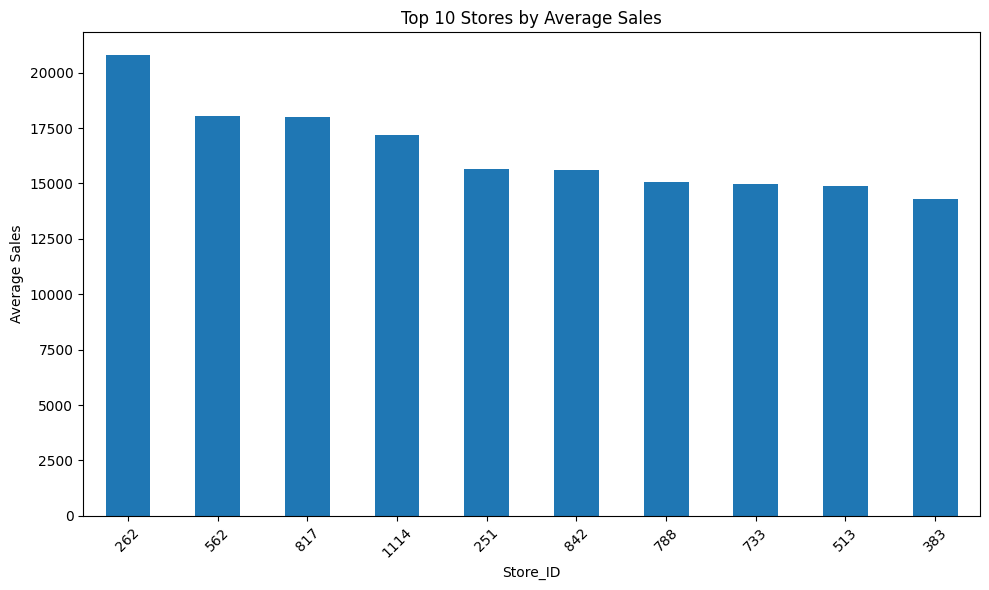

In [84]:
top_10_stores.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Stores by Average Sales')
plt.xlabel('Store_ID')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
top_10_worst = store_sales_mean.sort_values(ascending=False).tail(10)

In [86]:
top_10_worst 

Store_ID
210    2630.55
219    2599.59
794    2552.33
841    2525.45
254    2485.54
972    2472.80
208    2457.99
198    2418.99
543    2343.75
307    2230.76
Name: Sales, dtype: float64

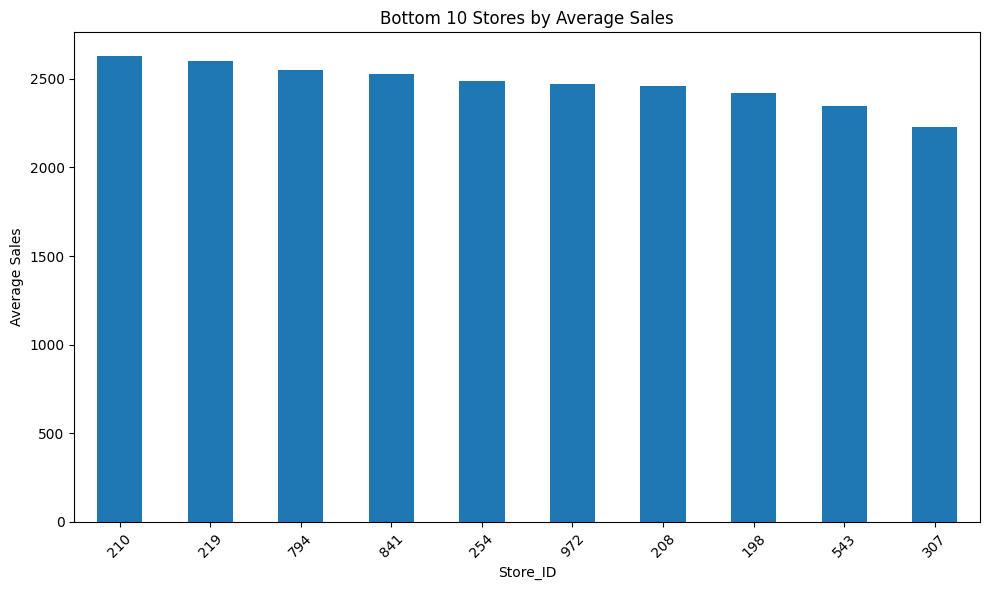

In [87]:
top_10_worst.plot(kind='bar', figsize=(10, 6))
plt.title('Bottom 10 Stores by Average Sales')
plt.xlabel('Store_ID')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:
day_sales_mean = df.groupby('Day_of_week')['Sales'].mean().sort_values(ascending=False)
day_sales_mean

Day_of_week
1    7812.766948
2    7004.780054
5    6726.462697
3    6555.350536
4    6255.380268
6    5850.032820
7     210.680439
Name: Sales, dtype: float64

In [89]:
# Group by 'Day_of_week' and 'Promotion', then calculate mean sales for each group
mean_sales_by_day_promo = df.groupby(['Day_of_week', 'Promotion'])['Sales'].mean().unstack().round(2)
mean_sales_by_day_promo

Promotion,0,1
Day_of_week,,
1,5604.67,9708.98
2,5612.97,8229.79
3,5422.48,7550.77
4,5100.90,7265.76
5,6177.16,7208.35
6,5850.03,NaN
7,210.68,NaN


In [90]:
# If 5604.67 is 100%, what percentage is 4104.31?
percentage_4104_31 = (4104.31 / 5604.67) * 100
percentage_4104_31

73.23018125955677

In [91]:
# 5604.67 + 9708.98 = 100%, what is 9708.98 in percentage?
total = 5604.67 + 9708.98
percentage = (9708.98 / total) * 100
percentage

63.40082214233706

In [92]:
# Calculate the percentage difference between promotion and no-promotion days for each day of the week
promo_diff_pct = ((mean_sales_by_day_promo[1] - mean_sales_by_day_promo[0]) / mean_sales_by_day_promo[0]) * 100
promo_diff_pct = promo_diff_pct.round(2)
promo_diff_pct

Day_of_week
1    73.23
2    46.62
3    39.25
4    42.44
5    16.69
6      NaN
7      NaN
dtype: float64

In [93]:
# Calculate the overall mean sales for promotion and no-promotion days (excluding NaN)
mean_no_promo = mean_sales_by_day_promo[0].mean()
mean_promo = mean_sales_by_day_promo[1].mean()

# Calculate the percentage difference for all days together
overall_promo_diff_pct = ((mean_promo - mean_no_promo) / mean_no_promo) * 100
overall_promo_diff_pct = round(overall_promo_diff_pct, 2)
overall_promo_diff_pct

np.float64(64.66)

# Data Cleaning

In [94]:
print(df.info(memory_usage='deep'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 105.7 MB
None


In [95]:
df = df.drop(['Date', 'True_index'], axis=1)

In [96]:
df['State_holiday'] = df['State_holiday'].replace({'a': 1, 'b': 2, 'c': 3})

In [97]:
#!pip install dask  
#import dask.dataframe as dd
#df_dask = dd.from_pandas(df, npartitions=4)


# Models

In [98]:
X = df[['Promotion', 'Day_of_week', 'Nb_customers_on_day','Store_ID']]
y = df['Sales']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [99]:


# Initialize and train Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=1200, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred_gbr)
r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting MSE: {mse:.2f}")
print(f"Gradient Boosting R2 Score: {r2:.2f}")

Gradient Boosting MSE: 336842.34
Gradient Boosting R2 Score: 0.97


In [100]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv')
df_2.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [ ]:


# 1. Prepare the features in df_2
X_new = df_2[['Promotion', 'Day_of_week', 'Nb_customers_on_day', 'Store_ID']]

# 2. Predict sales using the trained model
predicted_sales = gbr.predict(X_new)

# 3. Add predictions as a new column 'Sales' in df_2
df_2['Sales'] = predicted_sales

# 4. (Optional) Preview df_2
print(df_2.head())


   True_index  Store_ID  Day_of_week        Date  Nb_customers_on_day  Open  \
0           7       764            4  2013-12-26                    0     0   
1          19        22            3  2013-05-22                  449     1   
2          31      1087            6  2013-06-29                  622     1   
3          45       139            6  2013-08-17                  314     1   
4          56       568            1  2014-04-07                  356     1   

   Promotion State_holiday  School_holiday        Sales  
0          0             c               1  -117.953673  
1          0             0               1  2732.410375  
2          0             0               0  4953.917766  
3          0             0               0  2722.960718  
4          0             0               0  2593.872973  


In [105]:

df_2 = df_2.drop(['Sales'], axis=1)

In [ ]:
df_3 = df_2[['Predicted_sales']]
df_3